In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

# 128kbaud - 2022-09-25

In [2]:
x = np.fromfile('bw3_symbols_20220925_051912.f32', 'float32')

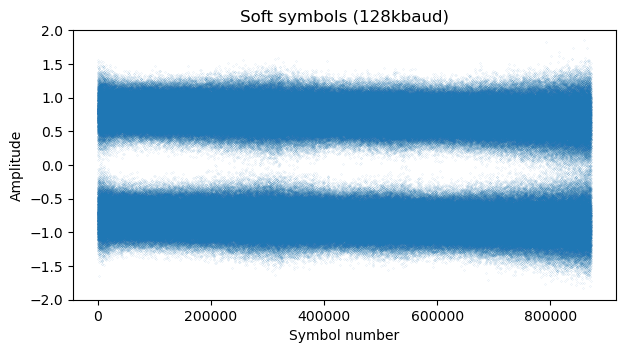

In [3]:
plt.plot(x, '.', markersize=0.1)
plt.ylim(-2, 2)
plt.title('Soft symbols (128kbaud)')
plt.ylabel('Amplitude')
plt.xlabel('Symbol number');

In [4]:
vit_out0 = np.fromfile('viterbi_out_0_20220925_051912.u8', 'uint8')
vit_out1 = np.fromfile('viterbi_out_1_20220925_051912.u8', 'uint8')

In [5]:
f = np.convolve([1, 1, 1, 1, 0, 0, 1], vit_out0) % 2
g = (np.convolve([1, 0, 1, 1, 0, 1, 1], vit_out0) % 2) ^ 1
conv_encoded0 = 2*np.vstack((f, g)).T.ravel().astype('float') - 1
f = np.convolve([1, 1, 1, 1, 0, 0, 1], vit_out1) % 2
g = (np.convolve([1, 0, 1, 1, 0, 1, 1], vit_out1) % 2) ^ 1
conv_encoded1 = 2*np.vstack((f, g)).T.ravel().astype('float')[1:] - 1

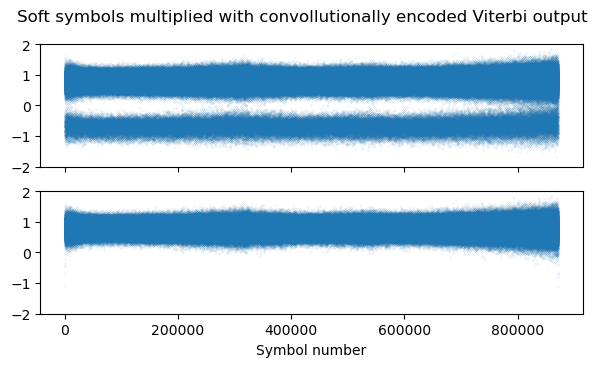

In [6]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(conv_encoded0 * x[:conv_encoded0.size], '.', markersize=0.1)
axs[1].plot(conv_encoded1 * x[:conv_encoded1.size], '.', markersize=0.1)
for ax in axs:
    ax.set_ylim(-2, 2)
axs[1].set_xlabel('Symbol number')
plt.suptitle('Soft symbols multiplied with convollutionally encoded Viterbi output');

In [7]:
ccsds_asm = np.array([int(a) for a in '00011010110011111111110000011101'])

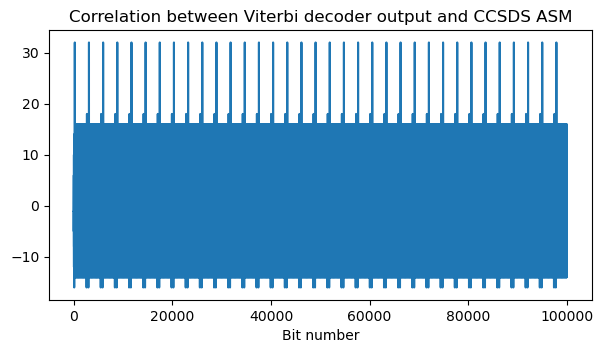

In [8]:
asm_corr = np.correlate(2*vit_out1.astype('float')-1, 2*ccsds_asm.astype('float')-1, mode='full')
plt.plot(asm_corr[:100000])
plt.title('Correlation between Viterbi decoder output and CCSDS ASM')
plt.xlabel('Bit number');

In [9]:
np.diff(np.where(asm_corr == 32)[0])

array([2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872,
       2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872,
       2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872,
       2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872,
       2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872,
       2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872,
       2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872,
       2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872,
       2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872,
       2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872,
       2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872,
       2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872,
       2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872, 2872,
       2872, 2872, 2872, 2872, 2872, 2872, 2872, 28

In [10]:
first_corr = np.where(asm_corr == ccsds_asm.size)[0][0] - ccsds_asm.size + 1
first_corr

180

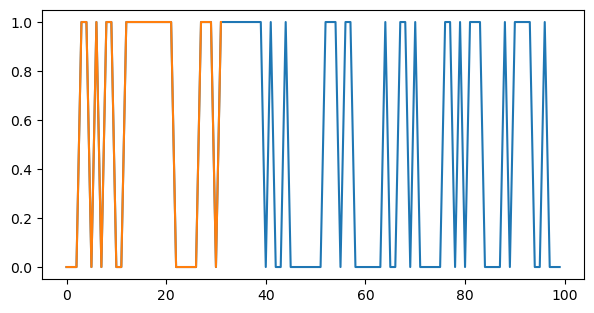

In [11]:
plt.plot(vit_out1[first_corr:][:100])
plt.plot(ccsds_asm)

In [12]:
frame_len = 32 + 355 * 8
frames = vit_out1[first_corr:]
frames = np.packbits(frames[:frames.size//frame_len*frame_len].reshape(-1, frame_len), axis=1)
frames.shape

(151, 359)

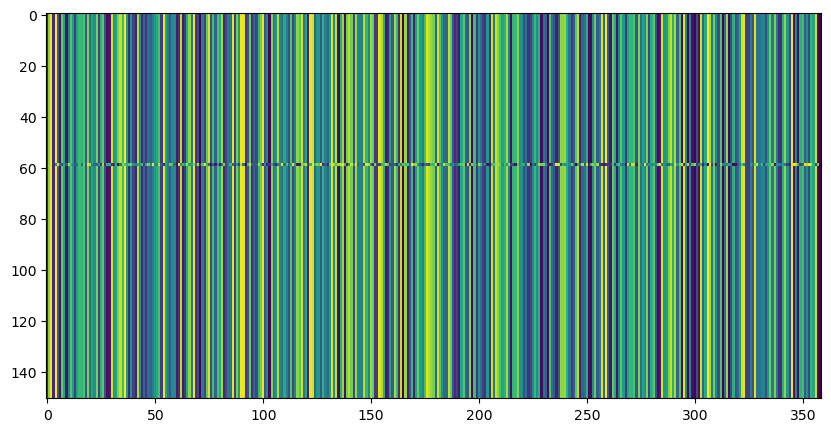

In [13]:
plt.figure(figsize=(10, 5))
plt.imshow(frames, aspect='auto', interpolation='none')

In [14]:
frames_128k = np.fromfile('bw3_frames_20220925_051912.u8', 'uint8').reshape(-1, 355)
frames_128k.shape

(149, 355)

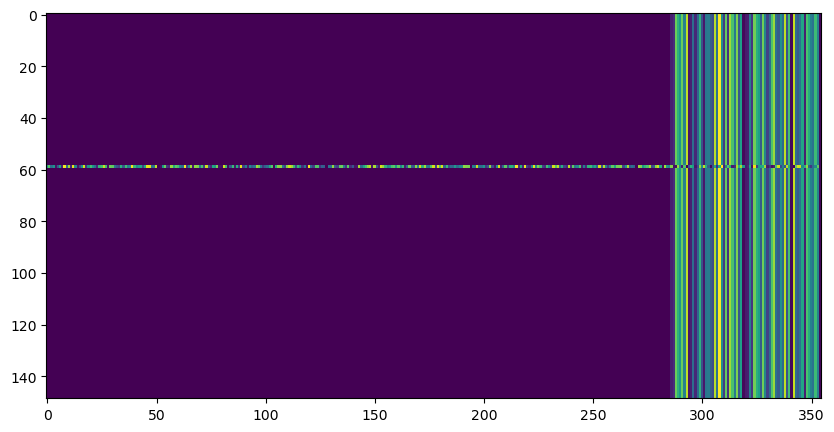

In [15]:
plt.figure(figsize=(10, 5))
plt.imshow(frames_128k, aspect='auto', interpolation='none')

In [16]:
def display_hex(x):
    x = x.hex()
    for j in range(0, len(x), 32):
        for k in range(0, 32, 2):
            print(x[j+k:j+k+2], end=' ' if k != 30 else '\n')

In [17]:
display_hex(bytes(frames_128k[0]))

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 15 20
c4 a4 86 c3 6f e5 0e 17 5b 1d 56 a3 3f 10 63 69
4b 3c e1 5f fd 7c 2b c0 24 da b5 68 cc 47 8f 05
12 15 68 29 c6 a1 90 4b c6 73 32 5b b7 d

In [18]:
frames_128k[0, :255+31]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [19]:
frames_128k[0, 255+31:]

array([ 21,  32, 196, 164, 134, 195, 111, 229,  14,  23,  91,  29,  86,
       163,  63,  16,  99, 105,  75,  60, 225,  95, 253, 124,  43, 192,
        36, 218, 181, 104, 204,  71, 143,   5,  18,  21, 104,  41, 198,
       161, 144,  75, 198, 115,  50,  91, 183, 215,  94,  73, 127,  86,
       229,  66, 176,   5, 232,  89,  72,  96, 150,  22, 181, 157, 111,
        96, 173, 113,   4], dtype=uint8)

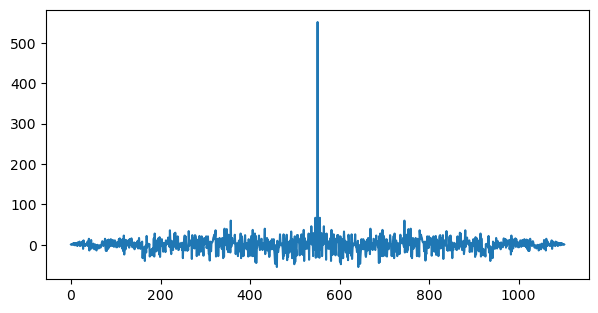

In [20]:
s = 2*np.unpackbits(frames_128k[0, 255+31:]).astype('float')-1
corr_s = np.correlate(s, s, mode='full')
plt.plot(corr_s)

In [21]:
np.where(~np.all(frames_128k == frames_128k[0], axis=1))[0]

array([59])

In [22]:
display_hex(bytes(frames_128k[59]))

80 bb 5d 82 0e 47 96 1b fb 60 dc 1d f5 77 0e 39
85 ed 25 86 b0 85 60 1e a9 b3 e8 ae 0a c5 bf 62
44 35 a3 49 b0 6b 7a f9 ab 79 8f 97 39 95 f4 f1
5d 63 e5 00 0b 89 c4 29 1f d4 99 bf b2 79 5c fb
2f 7c d9 17 d3 cc 66 b5 33 ea 43 20 9a 88 c9 0d
09 ed b2 08 4a ac 14 a2 2c f4 34 6d 11 79 4c 5e
db c3 66 2a 4b 5c 9b ba 04 9f d0 d1 60 35 ce ea
d9 ab 3e aa 7f 22 5c 0c fa 5c 32 bb b9 28 4f 4c
00 64 5e d4 49 2f bf c4 66 27 bd 22 44 0d 0f db
5c 94 b2 d4 e5 12 de 43 14 ed d8 a7 73 88 b3 bc
86 be 73 aa 15 50 c6 4f 43 d1 6e ec a5 db 69 67
b9 ec 37 f3 b8 ed 51 ab 3d 57 52 89 59 76 77 d5
ce ca 00 6d 63 e9 66 5c 84 29 40 d2 3b 0e 79 ef
17 56 be 37 9f a3 72 fb 25 9c 20 f8 31 1c 81 f2
79 cd af 32 24 b2 7e 37 ec b9 e5 4e a0 35 1e e6
25 bf 61 76 b7 15 68 1e a7 ac 75 96 4e ed 49 e1
6e 2b 74 be 93 c7 c8 d0 39 7d dd 48 5d 50 01 d9
c9 87 a7 b6 dc 3a 49 d2 ea 97 09 dd 87 73 cd 09
09 d6 74 14 b8 00 47 a4 8e 0f 3d d3 76 e3 9d 49
05 46 94 21 97 fd 1a 62 ba 98 13 20 df a1 da 84
11 1c 97 0a f7 2f 87 97 9c d8 13 26 09 1

## 512kbaud - 2022-10-05

In [23]:
x = np.memmap('bw3_symbols_20221005_192459.f32', 'float32')

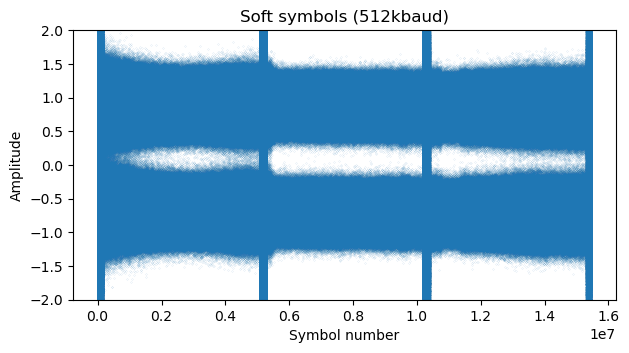

In [24]:
plt.plot(x, '.', markersize=0.1)
plt.ylim(-2, 2)
plt.title('Soft symbols (512kbaud)')
plt.ylabel('Amplitude')
plt.xlabel('Symbol number');

In [25]:
vit_out0 = np.memmap('viterbi_out_0_20221005_192459.u8', 'uint8')
vit_out1 = np.memmap('viterbi_out_1_20221005_192459.u8', 'uint8')
f = np.convolve([1, 1, 1, 1, 0, 0, 1], vit_out0) % 2
g = (np.convolve([1, 0, 1, 1, 0, 1, 1], vit_out0) % 2) ^ 1
conv_encoded0 = 2*np.vstack((f, g)).T.ravel().astype('float') - 1
f = np.convolve([1, 1, 1, 1, 0, 0, 1], vit_out1) % 2
g = (np.convolve([1, 0, 1, 1, 0, 1, 1], vit_out1) % 2) ^ 1
conv_encoded1 = 2*np.vstack((f, g)).T.ravel().astype('float')[1:] - 1

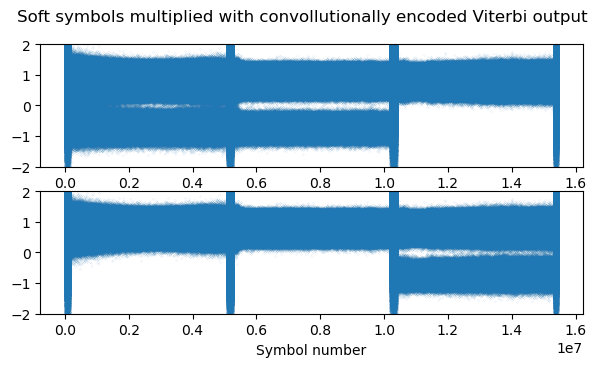

In [26]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(conv_encoded0 * x[:conv_encoded0.size], '.', markersize=0.1)
axs[1].plot(conv_encoded1 * x[:conv_encoded1.size], '.', markersize=0.1)
for ax in axs:
    ax.set_ylim(-2, 2)
axs[1].set_xlabel('Symbol number')
plt.suptitle('Soft symbols multiplied with convollutionally encoded Viterbi output');

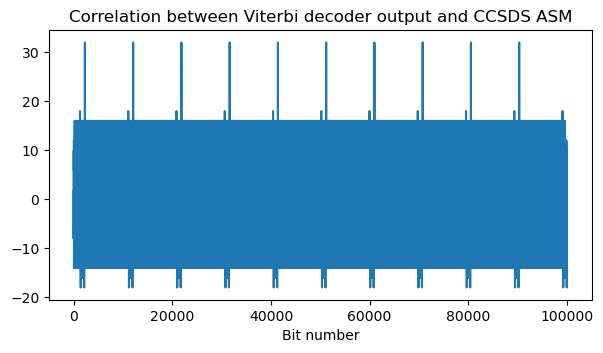

In [27]:
asm_corr0 = np.correlate(2*vit_out0.astype('float')-1, 2*ccsds_asm.astype('float')-1, mode='full')
asm_corr1 = np.correlate(2*vit_out1.astype('float')-1, 2*ccsds_asm.astype('float')-1, mode='full')
plt.plot(asm_corr0[6000000:][:100000])
plt.title('Correlation between Viterbi decoder output and CCSDS ASM')
plt.xlabel('Bit number');

In [28]:
np.diff(np.where(asm_corr0 == ccsds_asm.size))

array([[9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784,
        9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784,
        9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784,
        9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784,
        9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784,
        9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784,
        9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784,
        9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784,
        9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784,
        9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784,
        9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784,
        9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784,
        9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784, 9784,
        9784, 9784, 9784, 9784, 9784, 

In [29]:
np.diff(np.where(asm_corr1 == ccsds_asm.size))

array([[  9784,   9784,   9784,   9784,   9784,   9784,   9784,   9784,
          9784,   9784,   9784,   9784,   9784,   9784,   9784,   9784,
          9784,   9784,   9784,   9784,   9784,   9784,   9784,   9784,
          9784,   9784,   9784,   9784,   9784,   9784,   9784,   9784,
          9784,   9784,   9784,   9784,   9784,   9784,   9784,   9784,
          9784,   9784,   9784,   9784,   9784,   9784,   9784,   9784,
          9784,   9784,   9784,   9784,   9784,   9784,   9784,   9784,
          9784,   9784,   9784,   9784,   9784,   9784,   9784,   9784,
          9784,   9784,   9784,   9784,   9784,   9784,   9784,   9784,
          9784,   9784,   9784,   9784,   9784,   9784,   9784,   9784,
          9784,   9784,   9784,   9784,   9784,   9784,   9784,   9784,
          9784,   9784,   9784,   9784,   9784,   9784,   9784,   9784,
          9784,   9784,   9784,   9784,   9784,   9784,   9784,   9784,
          9784,   9784,   9784,   9784,   9784,   9784,   9784, 

In [30]:
frame_len = 32 + 1219 * 8
frames0 = vit_out0
frames0 = np.packbits(frames0[:frames0.size//frame_len*frame_len].reshape(-1, frame_len), axis=1)
frames1 = vit_out1
frames1 = np.packbits(frames1[:frames1.size//frame_len*frame_len].reshape(-1, frame_len), axis=1)
frames0.shape

(789, 1223)

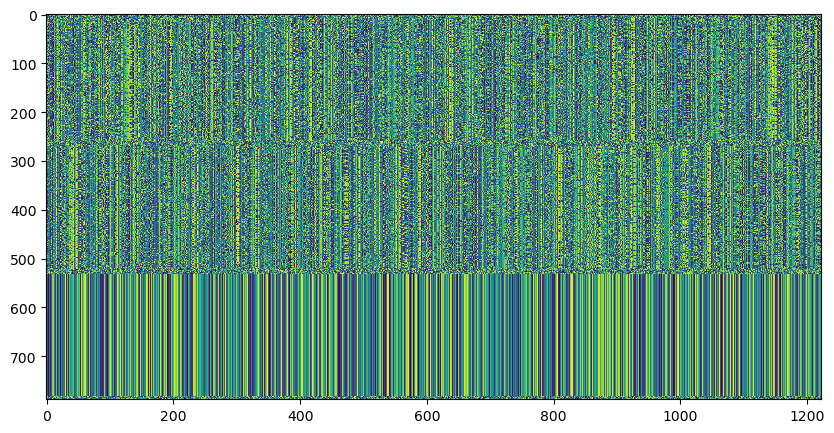

In [31]:
plt.figure(figsize=(10, 5))
plt.imshow(frames0, aspect='auto', interpolation='none')

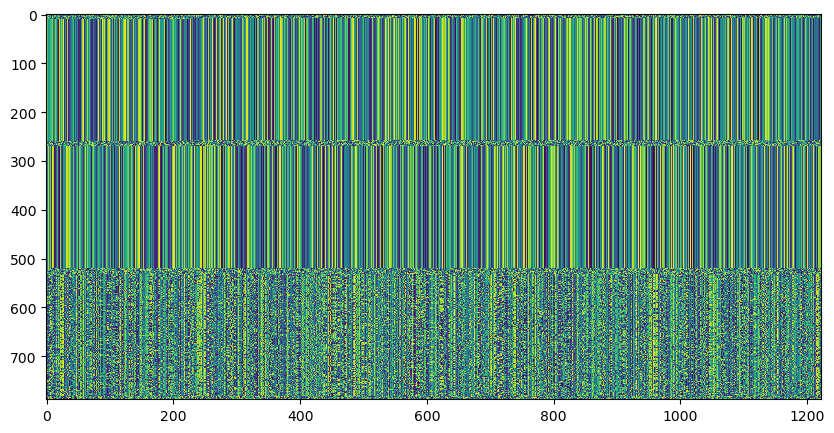

In [32]:
plt.figure(figsize=(10, 5))
plt.imshow(frames1, aspect='auto', interpolation='none')

In [33]:
first_corr_burst1 = np.where(asm_corr1 == ccsds_asm.size)[0][0] - ccsds_asm.size + 1
first_corr_burst1, first_corr_burst1 * 2

(80079, 160158)

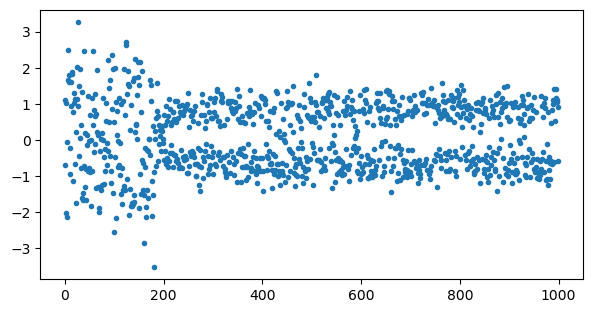

In [34]:
plt.plot(x[159900:][:1000], '.')

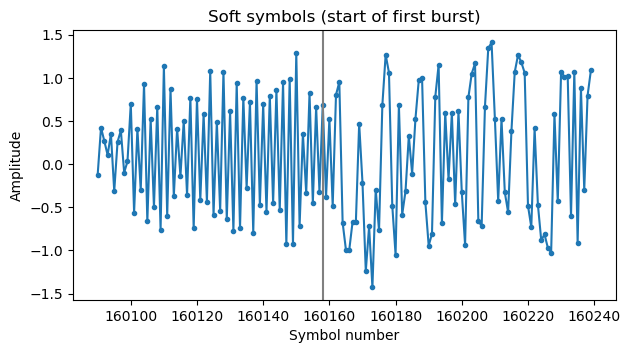

In [35]:
sel = slice(160090, 160090+150)
plt.plot(np.arange(x.size)[sel], x[sel], '.-')
plt.axvline(x=first_corr_burst1*2, color='grey')
plt.title('Soft symbols (start of first burst)')
plt.ylabel('Amplitude')
plt.xlabel('Symbol number');

In [36]:
first_corr_burst2 = np.where(asm_corr1 == ccsds_asm.size)[0][
    np.where(np.diff(np.where(asm_corr1 == ccsds_asm.size)[0]) > 9784)[0][0]+1] - ccsds_asm.size + 1
first_corr_burst2, first_corr_burst2 * 2

(2640018, 5280036)

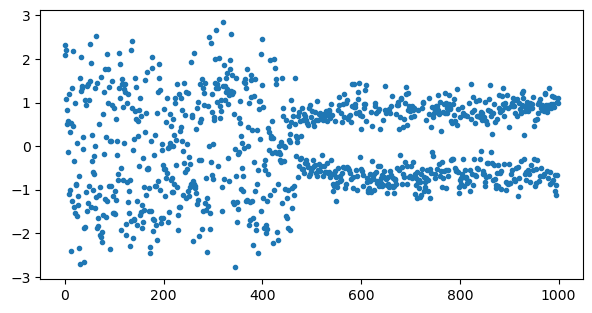

In [37]:
plt.plot(x[5279500:][:1000], '.')

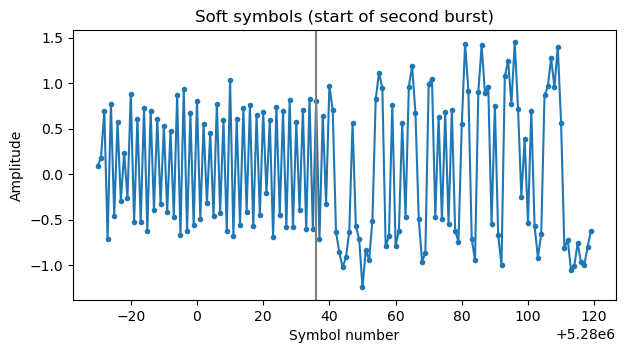

In [38]:
sel = slice(5279970, 5279970+150)
plt.plot(np.arange(x.size)[sel], x[sel], '.-')
plt.axvline(x=first_corr_burst2*2, color='grey')
plt.title('Soft symbols (start of second burst)')
plt.ylabel('Amplitude')
plt.xlabel('Symbol number');

In [39]:
frames_burst1 = vit_out1[first_corr_burst1:]
frames_burst1 = np.packbits(frames_burst1[:frames_burst1.size//frame_len*frame_len].reshape(-1, frame_len), axis=1)

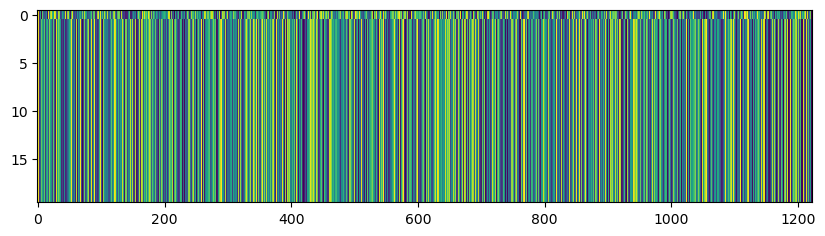

In [40]:
plt.figure(figsize=(10, 2.5))
plt.imshow(frames_burst1[:20], aspect='auto', interpolation='none')

In [41]:
frames_burst2 = vit_out1[first_corr_burst2:]
frames_burst2 = np.packbits(frames_burst2[:frames_burst2.size//frame_len*frame_len].reshape(-1, frame_len), axis=1)

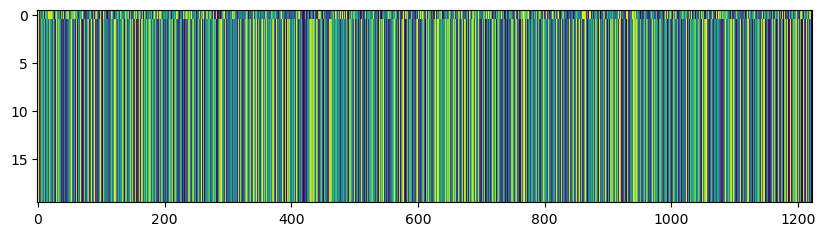

In [42]:
plt.figure(figsize=(10, 2.5))
plt.imshow(frames_burst2[:20], aspect='auto', interpolation='none')

In [43]:
frames_512k = np.fromfile('bw3_frames_20221005_192459.u8', 'uint8').reshape(-1, 1219)

In [44]:
frames_512k.shape

(753, 1219)

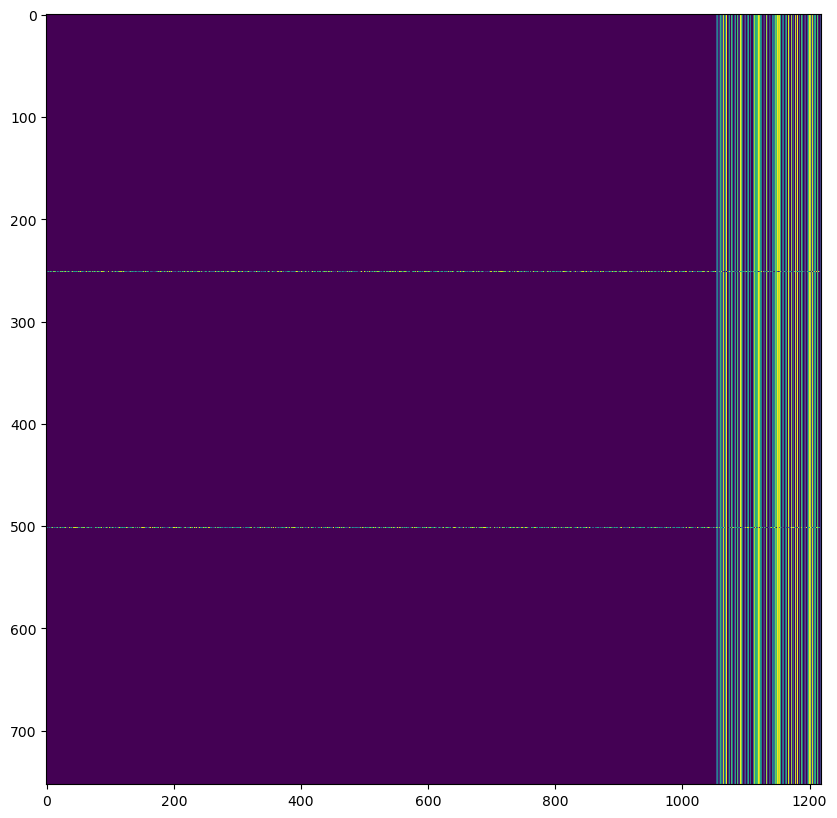

In [45]:
plt.figure(figsize=(10, 10))
plt.imshow(frames_512k, aspect='auto', interpolation='none')

In [46]:
np.where(~np.all(frames_512k == frames_512k[1], axis=1))[0]

array([  0, 251, 502])

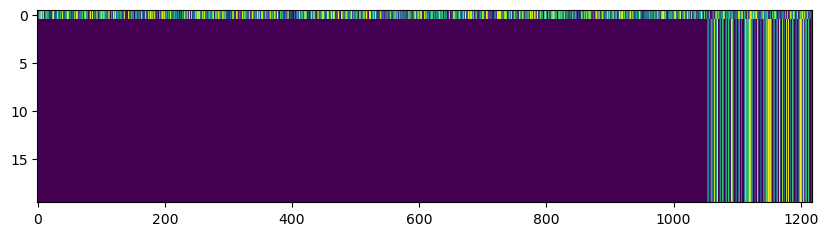

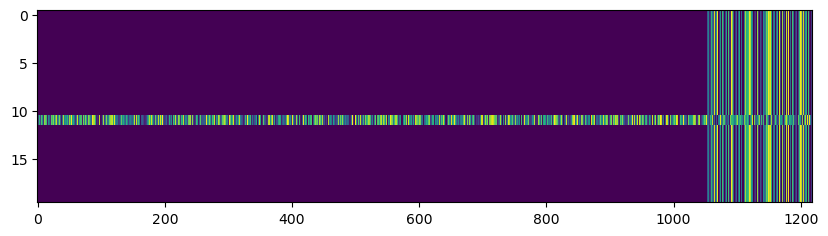

In [47]:
plt.figure(figsize=(10, 2.5))
plt.imshow(frames_512k[:20], aspect='auto', interpolation='none')

plt.figure(figsize=(10, 2.5))
plt.imshow(frames_512k[240:260], aspect='auto', interpolation='none')

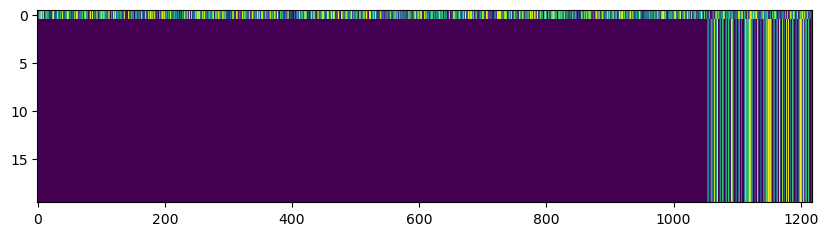

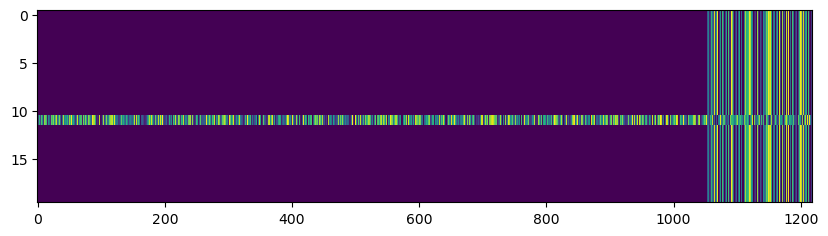

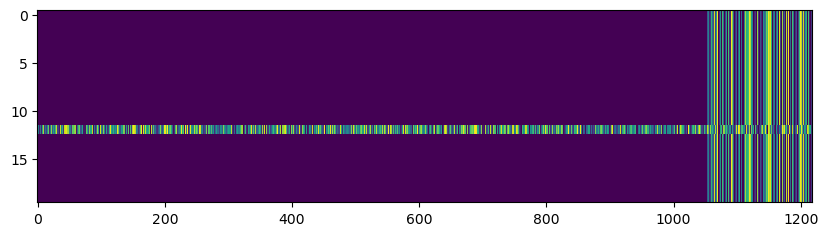

In [48]:
plt.figure(figsize=(10, 2.5))
plt.imshow(frames_512k[:20], aspect='auto', interpolation='none')

plt.figure(figsize=(10, 2.5))
plt.imshow(frames_512k[240:260], aspect='auto', interpolation='none')

plt.figure(figsize=(10, 2.5))
plt.imshow(frames_512k[490:510], aspect='auto', interpolation='none')

In [49]:
display_hex(bytes(frames_512k[1]))

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 0

In [50]:
bytes(frames_512k[1])[-165:].hex()

'46b570168f26a400577b40ec002f8db2fc00e31f3f81003cb158a6002e02945800b4e7211900fdca184a000120324b00d6559e2f00f45a016f006af2daa000a48db2fc00e38e556c00c4161c29007ed527cb003d161c29007e8e556c00c48db2fc00e3f2daa000a45a016f006a559e2f00f420324b00d6ca184a0001e7211900fd02945800b4b158a6002e1f3f81003c8db2fc00e37b40ec002f8f26a40057b5701600462f'

In [51]:
for j in [0, 251, 502]:
    display_hex(bytes(frames_512k[j]))
    print()
    print()

e6 df 3b c0 5b c0 3e fd 96 69 e9 0c ae 90 b2 85
a4 4f 8c 26 93 2b 25 c4 c8 fe a5 5b a0 2d 57 60
e6 a0 21 39 ac 76 65 2b e8 45 39 3d 80 8b 97 fc
bf db 43 45 91 00 22 56 5b 34 ca 9d 7f df f2 e8
68 29 61 ce 7d 69 27 b9 9a 32 c6 8c eb 88 41 88
e2 0d 4d 1a fc 36 43 fa 33 61 7d f6 44 c2 c8 b6
0d 26 91 b3 8d e6 67 b0 d4 2f b3 8e 76 64 55 b3
cb 89 b8 03 46 9e 1f 96 fa a6 8a f5 68 70 92 96
7b 67 a6 a6 84 89 24 da 5f dc 23 17 0d cc 0a f1
b8 63 95 56 ab 7f 74 8b ad 00 91 4d 99 77 49 5a
ff 81 2d 2e e7 5f d7 26 04 35 e0 43 51 26 ee e3
80 44 fe 39 bb c9 27 85 dc 56 45 2b ec 39 12 08
bb fb 3e b8 e6 f4 b4 7f ee b6 6b 99 93 3f a0 81
6c ed e5 5b a9 67 55 cf af 5a e1 8a 23 84 8f 2a
08 58 84 1d 94 93 4b 17 e0 9d 81 7b cc 18 2e f1
d0 0e 49 e6 3b 28 42 62 8c cc b2 c6 fa 15 d9 f3
d9 68 41 f5 e0 98 4a f4 f1 5a 64 ed 3a 8c 72 b7
7c 1a 7f 69 bc ef 7e 0d be 20 bd 89 24 ef c9 b5
75 74 54 e0 0e c7 aa 8f b1 77 45 23 2a 2e 13 4f
7d 28 4d ce 79 d3 2c f9 17 f4 3d bd 12 b9 86 40
2e 34 20 f2 78 bf c9 ab 7a 84 70 4b 4b 2